In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = 0

In [2]:
df_origin = pd.read_csv('train.csv')

In [3]:
final_df = pd.read_csv('df_final.csv')

In [4]:
target_correlation = final_df.corr()['log_price'].abs().sort_values(ascending=False)

In [5]:
target_correlation[:10]

log_price                    1.000000
room_type_Entire home/apt    0.606173
room_type_Private room       0.535544
accommodates_1               0.321770
median_home_value            0.295915
child_friendly               0.291688
bathrooms_1.0                0.286417
accommodates_2               0.278572
tv                           0.273767
accommodates_6               0.251924
Name: log_price, dtype: float64

In [6]:
high_correlation_columns = target_correlation[target_correlation > 0.05].index

In [7]:
len(high_correlation_columns)

58

In [8]:
model_cols = high_correlation_columns
final_df[model_cols]

,log_price,room_type_Entire home/apt,room_type_Private room,accommodates_1,median_home_value,child_friendly,bathrooms_1.0,accommodates_2,tv,accommodates_6,room_type_Shared room,accommodates_8,bathrooms_2.0,distance_to_center,accommodates_4,SF,white_goods,bathrooms_2.5,accommodates_5,accommodates_10,bathrooms_3.5,cancellation_policy_strict,bathrooms_3.0,thumbnail_url,accommodates_7,private_entrance,gym,elevator,cleaning_fee,event_suitable,check_in_24h,accommodates_16,accommodates_12,bed_type_Real Bed,cancellation_policy_flexible,bathrooms_4.5,time_since_last_review,DC,host_since_day,accommodates_9,accessible,NYC,bathrooms_4.0,smoking_allowed,property_type_Condominium,hot_tub_sauna_or_pool,bed_type_Futon,property_type_Dorm,accommodates_14,bathrooms_5.5,LA,bathrooms_5.0,number_of_reviews,super_host,air_conditioning,bed_type_Airbed,Chicago,coffee_machine
0,5.010635,1,0,0,817.924202,1.0,1,0,0.0,0,0,0,0,0.165928,0,0,0.0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1,0.0,0.0,0,0,1,0,0,2556.0,0,4131,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,1.098612,0,1.0,0,0,0.0
1,5.129899,1,0,0,899.221886,1.0,1,0,0.0,0,0,0,0,0.221665,0,0,1.0,0,0,0,0,1,0,1,1,0.0,0.0,0.0,1,0.0,0.0,0,0,1,0,0,2124.0,0,2220,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,1.945910,0,1.0,0,0,0.0
2,4.976734,1,0,0,846.226920,1.0,1,0,1.0,0,0,0,0,0.328448,0,0,0.0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,1,0.0,0.0,0,0,1,0,0,2133.0,0,2457,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,2.397895,0,1.0,0,0,0.0
3,6.620073,1,0,0,954.725091,0.0,1,0,1.0,0,0,0,0,0.112058,1,1,1.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.0,0.0,0,0,1,1,0,0.0,0,3012,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0,0,0.000000,0,0.0,0,0,0.0
4,4.744932,1,0,0,734.438561,0.0,1,1,1.0,0,0,0,0,0.136273,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1,0.0,0.0,0,0,1,0,0,2368.0,1,3061,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0,0,1.609438,0,1.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73946,4.605170,0,1,1,730.342385,0.0,1,0,0.0,0,0,0,0,0.259795,0,0,0.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0,0.0,0.0,0,0,1,1,0,0.0,0,3768,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,0.000000,0,0.0,0,0,0.0
73947,5.043425,1,0,0,1000.000500,1.0,0,0,1.0,0,0,0,1,0.486126,1,0,1.0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1,0.0,0.0,0,0,1,0,0,2285.0,0,2632,0,0.0,0,0,0.0,0,0.0,0,0,0,0,1,0,2.833213,0,0.0,0,0,0.0
73948,5.220356,1,0,0,730.342385,1.0,1,0,1.0,0,0,0,0,0.254927,0,0,1.0,0,1,0,0,0,0,1,0,0.0,1.0,1.0,1,0.0,0.0,0,0,1,0,0,2137.0,0,4212,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,3.784190,1,1.0,0,0,1.0
73949,5.273000,1,0,0,956.294934,0.0,1,1,1.0,0,0,0,0,0.139405,0,0,1.0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,1,0.0,0.0,0,0,1,0,0,0.0,0,2130,0,0.0,1,0,0.0,0,0.0,0,0,0,0,0,0,0.000000,0,1.0,0,0,0.0


### Data scaled

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df[model_cols])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=model_cols)
data_scaled.head()

,log_price,room_type_Entire home/apt,room_type_Private room,accommodates_1,median_home_value,child_friendly,bathrooms_1.0,accommodates_2,tv,accommodates_6,room_type_Shared room,accommodates_8,bathrooms_2.0,distance_to_center,accommodates_4,SF,white_goods,bathrooms_2.5,accommodates_5,accommodates_10,bathrooms_3.5,cancellation_policy_strict,bathrooms_3.0,thumbnail_url,accommodates_7,private_entrance,gym,elevator,cleaning_fee,event_suitable,check_in_24h,accommodates_16,accommodates_12,bed_type_Real Bed,cancellation_policy_flexible,bathrooms_4.5,time_since_last_review,DC,host_since_day,accommodates_9,accessible,NYC,bathrooms_4.0,smoking_allowed,property_type_Condominium,hot_tub_sauna_or_pool,bed_type_Futon,property_type_Dorm,accommodates_14,bathrooms_5.5,LA,bathrooms_5.0,number_of_reviews,super_host,air_conditioning,bed_type_Airbed,Chicago,coffee_machine
0,0.500000,1.0,0.0,0.0,0.748624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.483084,0.0,0.576242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184220,0.0,1.0,0.0,0.0,0.0
1,0.525898,1.0,0.0,0.0,0.860864,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.401436,0.0,0.030554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326299,0.0,1.0,0.0,0.0,0.0
2,0.492638,1.0,0.0,0.0,0.787699,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.367405,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.403137,0.0,0.098230,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402090,0.0,1.0,0.0,0.0,0.0
3,0.849485,1.0,0.0,0.0,0.937492,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.117210,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.256710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.442303,1.0,0.0,0.0,0.633364,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.145208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.447552,1.0,0.270702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269878,0.0,1.0,0.0,0.0,0.0


In [10]:

X = data_scaled.drop(['log_price'], axis =1)
y = final_df.log_price

In [11]:
y

0        5.010635
1        5.129899
2        4.976734
3        6.620073
4        4.744932
           ...   
73946    4.605170
73947    5.043425
73948    5.220356
73949    5.273000
73950    4.852030
Name: log_price, Length: 73951, dtype: float64

In [12]:
X

,room_type_Entire home/apt,room_type_Private room,accommodates_1,median_home_value,child_friendly,bathrooms_1.0,accommodates_2,tv,accommodates_6,room_type_Shared room,accommodates_8,bathrooms_2.0,distance_to_center,accommodates_4,SF,white_goods,bathrooms_2.5,accommodates_5,accommodates_10,bathrooms_3.5,cancellation_policy_strict,bathrooms_3.0,thumbnail_url,accommodates_7,private_entrance,gym,elevator,cleaning_fee,event_suitable,check_in_24h,accommodates_16,accommodates_12,bed_type_Real Bed,cancellation_policy_flexible,bathrooms_4.5,time_since_last_review,DC,host_since_day,accommodates_9,accessible,NYC,bathrooms_4.0,smoking_allowed,property_type_Condominium,hot_tub_sauna_or_pool,bed_type_Futon,property_type_Dorm,accommodates_14,bathrooms_5.5,LA,bathrooms_5.0,number_of_reviews,super_host,air_conditioning,bed_type_Airbed,Chicago,coffee_machine
0,1.0,0.0,0.0,0.748624,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.483084,0.0,0.576242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184220,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.860864,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.243939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.401436,0.0,0.030554,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326299,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.787699,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.367405,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.403137,0.0,0.098230,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402090,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.937492,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.117210,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.256710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.633364,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.145208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.447552,1.0,0.270702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.269878,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73946,0.0,1.0,1.0,0.627708,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.472587,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
73947,1.0,0.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.549716,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.431865,0.0,0.148201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.475086,0.0,0.0,0.0,0.0,0.0
73948,1.0,0.0,0.0,0.627708,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.282399,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.403893,0.0,0.599372,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634550,1.0,1.0,0.0,0.0,1.0
73949,1.0,0.0,0.0,0.939660,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.148829,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.004854,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

## XGBRegressor

In [15]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.28612808486790214

Mean Squarred Error of XGBoost Regressor     :  0.15075098860306185

Root Mean Squarred Error of XGBoost Regressor:  0.388266646266534

R2 Score of XGBoost Regressor                :  0.700838868846838


<Figure size 4000x4000 with 0 Axes>

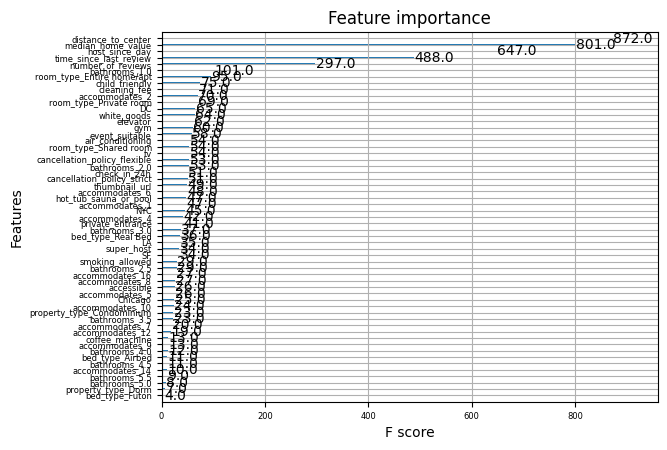

In [23]:
plt.figure(figsize=(40, 40))
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(xgb)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()


In [16]:
k_t = pd.DataFrame({"gercek_y": np.exp(y[0:50]),
                    "tahmin_y": np.exp(xgb.predict(X)[0:50])})

k_t

,gercek_y,tahmin_y
0,150.0,156.632248
1,169.0,229.389938
2,145.0,150.634201
3,750.0,319.248627
4,115.0,110.174026
5,85.0,103.107353
6,83.0,122.185806
7,120.0,155.389175
8,120.0,102.691772
9,36.0,37.352726


In [17]:
df_origin['amenities'][3]

'{TV,"Cable TV",Internet,"Wireless Internet",Kitchen,"Indoor fireplace","Buzzer/wireless intercom",Heating,Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials}'

In [18]:
df_origin.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


## Lineer Regresyon

In [24]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3252217453815039

Mean Squarred Error of Linear Regression     :  0.1887253383893279

Root Mean Squarred Error of Linear Regression:  0.4344252966728893

R2 Score of Linear Regression                :  0.6254798311241863


## Random Forest

In [32]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = metrics.mean_absolute_error(y_test, y_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
r2_rf = metrics.r2_score(y_test, y_pred_rf)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.28992551538228145

Mean Squarred Error of Random Forest Regressor     :  0.1569280810135495

Root Mean Squarred Error of Random Forest Regressor:  0.39614149115379155

R2 Score of Random Forest Regressor                :  0.6885806012899673


In [51]:
ft_weights_rf = pd.DataFrame(rf.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_rf.sort_values('weight', inplace=True)
ft_weights_rf

,weight
property_type_Dorm,0.000238
accommodates_14,0.000382
bathrooms_5.5,0.000534
bathrooms_5.0,0.000562
bathrooms_4.5,0.000621
accommodates_9,0.000627
bed_type_Airbed,0.000673
bed_type_Futon,0.000724
bathrooms_4.0,0.001141
accommodates_12,0.001285


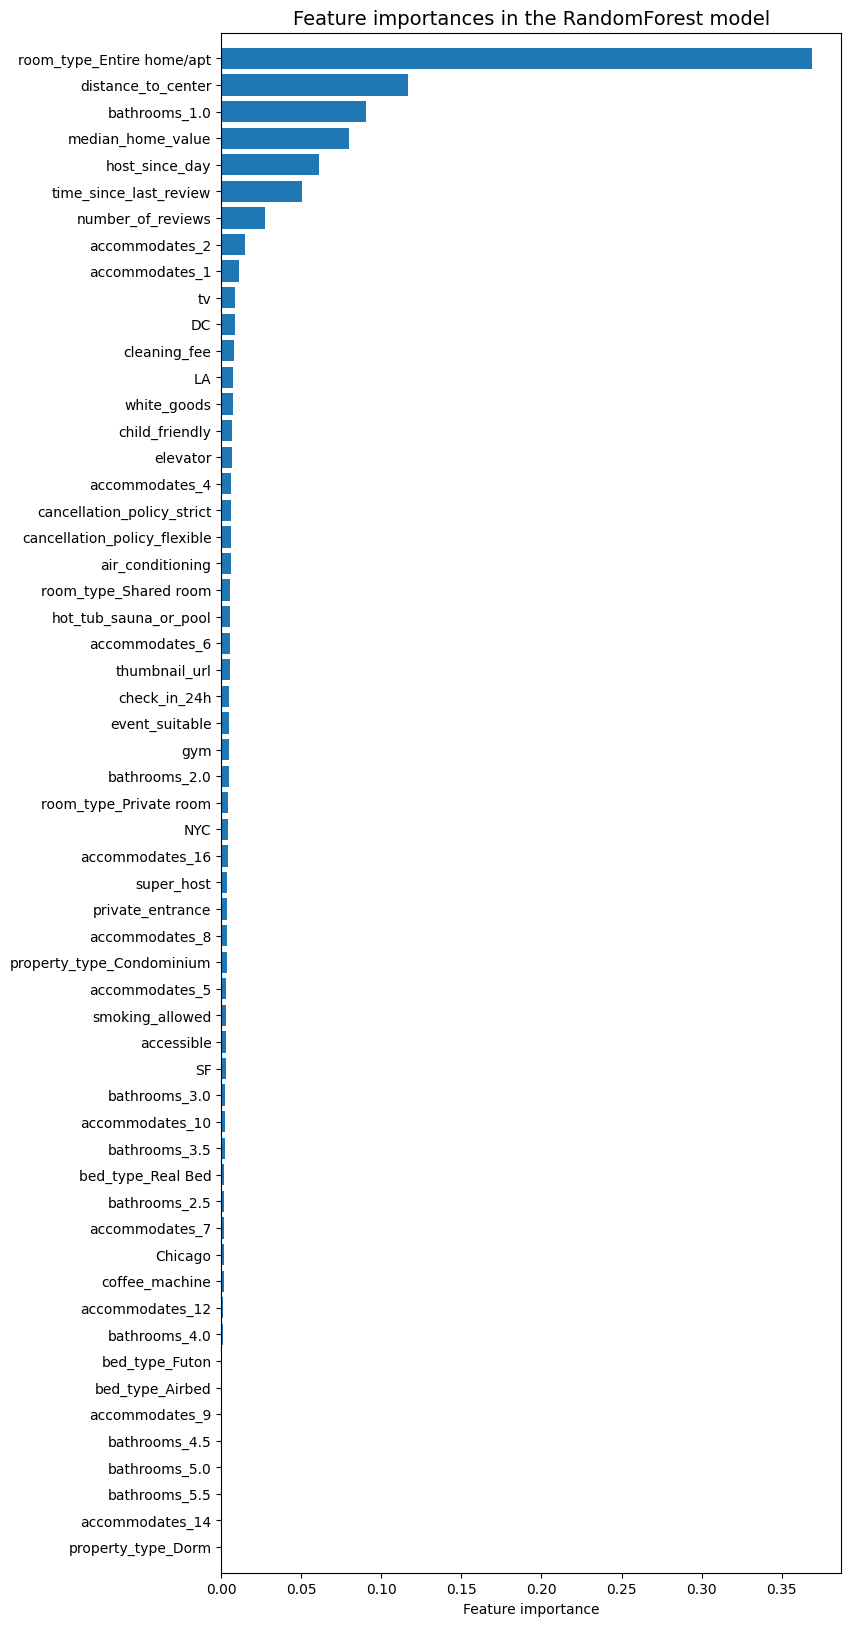

In [52]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_rf.index, ft_weights_rf.weight, align='center') 
plt.title("Feature importances in the RandomForest model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Pipline

In [34]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(x_train, y_train)

y_pred_poly = poly_tuned.predict(x_test)


mae_poly  = metrics.mean_absolute_error(y_test, y_pred_poly)
mse_poly  = metrics.mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
r2_poly   = metrics.r2_score(y_test, y_pred_poly)


print('\nMean Absolute Error of Polynomial Regression     : ', mae_poly)
print('\nMean Squarred Error of Polynomial Regression     : ', mse_poly)
print('\nRoot Mean Squarred Error of Polynomial Regression: ', rmse_poly)
print('\nR2 Score of Polynomial Regression                : ', r2_poly)

c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\


Mean Absolute Error of Polynomial Regression     :  0.3001714137263176

Mean Squarred Error of Polynomial Regression     :  0.16162742947854902

Root Mean Squarred Error of Polynomial Regression:  0.40202914008632384

R2 Score of Polynomial Regression                :  0.6792548753660473


## CatBoost

In [35]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)


print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.078012
0:	learn: 0.6787124	total: 201ms	remaining: 3m 20s
1:	learn: 0.6520244	total: 223ms	remaining: 1m 51s
2:	learn: 0.6281689	total: 240ms	remaining: 1m 19s
3:	learn: 0.6065772	total: 268ms	remaining: 1m 6s
4:	learn: 0.5873416	total: 288ms	remaining: 57.4s
5:	learn: 0.5706876	total: 312ms	remaining: 51.7s
6:	learn: 0.5557246	total: 352ms	remaining: 49.9s
7:	learn: 0.5431419	total: 389ms	remaining: 48.2s
8:	learn: 0.5317524	total: 441ms	remaining: 48.5s
9:	learn: 0.5217267	total: 475ms	remaining: 47s
10:	learn: 0.5130831	total: 506ms	remaining: 45.5s
11:	learn: 0.5052606	total: 535ms	remaining: 44s
12:	learn: 0.4982740	total: 563ms	remaining: 42.7s
13:	learn: 0.4918691	total: 592ms	remaining: 41.7s
14:	learn: 0.4858789	total: 613ms	remaining: 40.2s
15:	learn: 0.4810683	total: 636ms	remaining: 39.1s
16:	learn: 0.4766081	total: 654ms	remaining: 37.8s
17:	learn: 0.4728627	total: 674ms	remaining: 36.8s
18:	learn: 0.4693851	total: 698ms	remaining: 36s
19:	learn: 0.4

In [47]:
ft_weights_model_CBR = pd.DataFrame(model_CBR.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_model_CBR.sort_values('weight', inplace=True)
ft_weights_model_CBR



,weight
bed_type_Futon,0.012442
bed_type_Airbed,0.042379
property_type_Dorm,0.043901
coffee_machine,0.061294
accessible,0.086660
bathrooms_5.5,0.099539
bathrooms_5.0,0.100447
smoking_allowed,0.112591
accommodates_14,0.113644
accommodates_9,0.125513


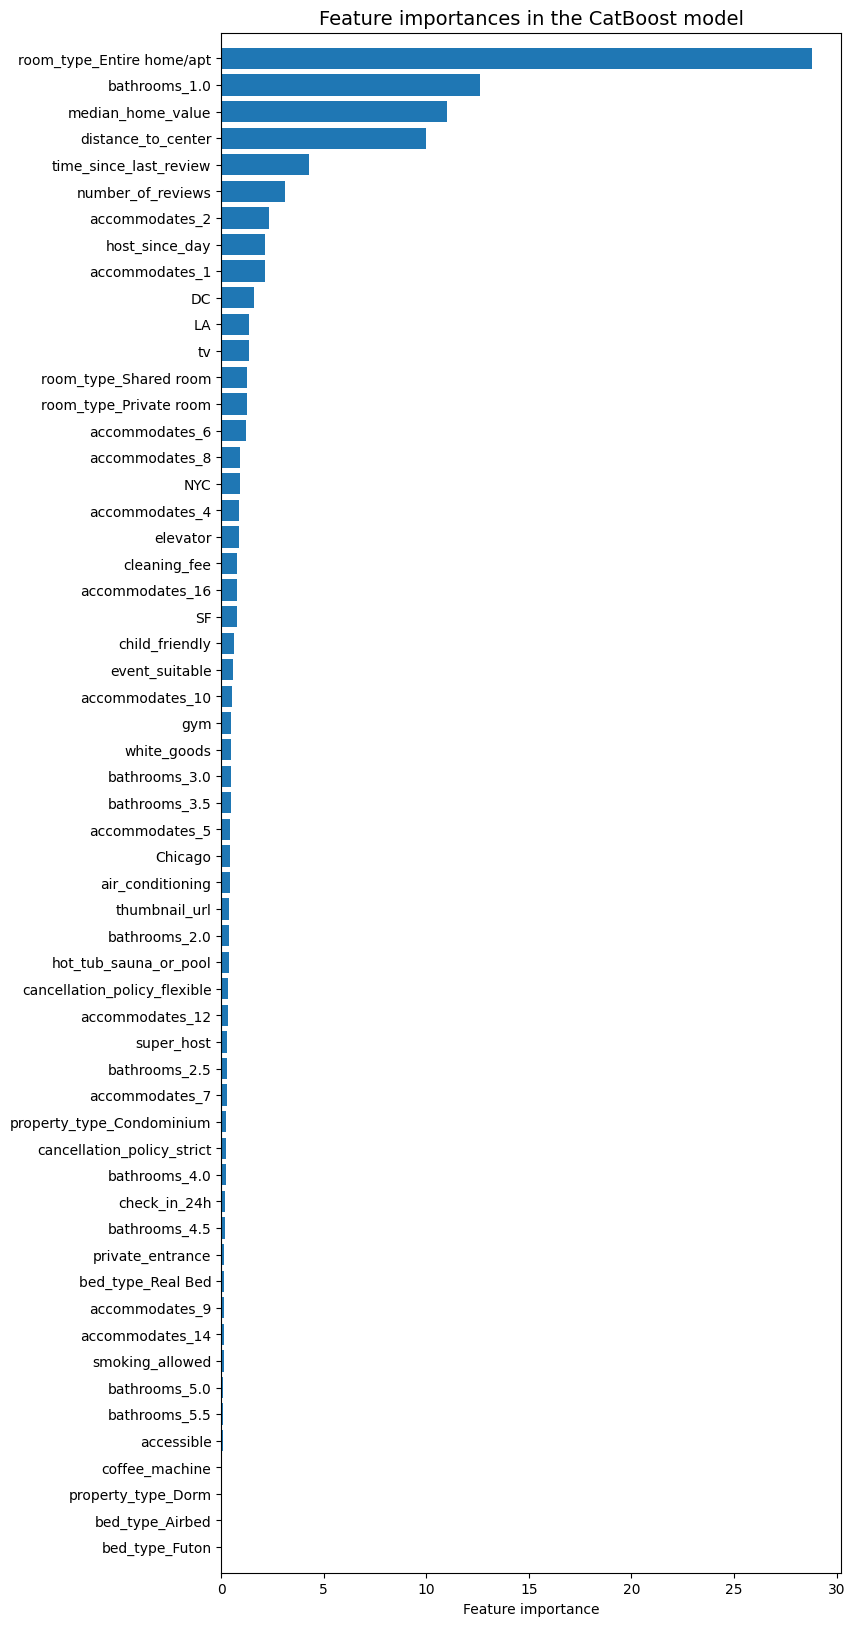

In [48]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_model_CBR.index, ft_weights_model_CBR.weight, align='center') 
plt.title("Feature importances in the CatBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Gradient Boosting Regresor

In [36]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.3078815148426801

Mean Squarred Error of Gradient Boosting     :  0.17133531580953307

Root Mean Squarred Error of Gradient Boosting:  0.41392670342650406

R2 Score of Gradient Boosting                :  0.6599898457778798


In [49]:
ft_weights_gb = pd.DataFrame(gb.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_gb.sort_values('weight', inplace=True)
ft_weights_gb

,weight
coffee_machine,0.000000
accessible,0.000000
bed_type_Airbed,0.000000
air_conditioning,0.000000
bed_type_Real Bed,0.000000
check_in_24h,0.000000
thumbnail_url,0.000000
cancellation_policy_strict,0.000000
smoking_allowed,0.000009
private_entrance,0.000020


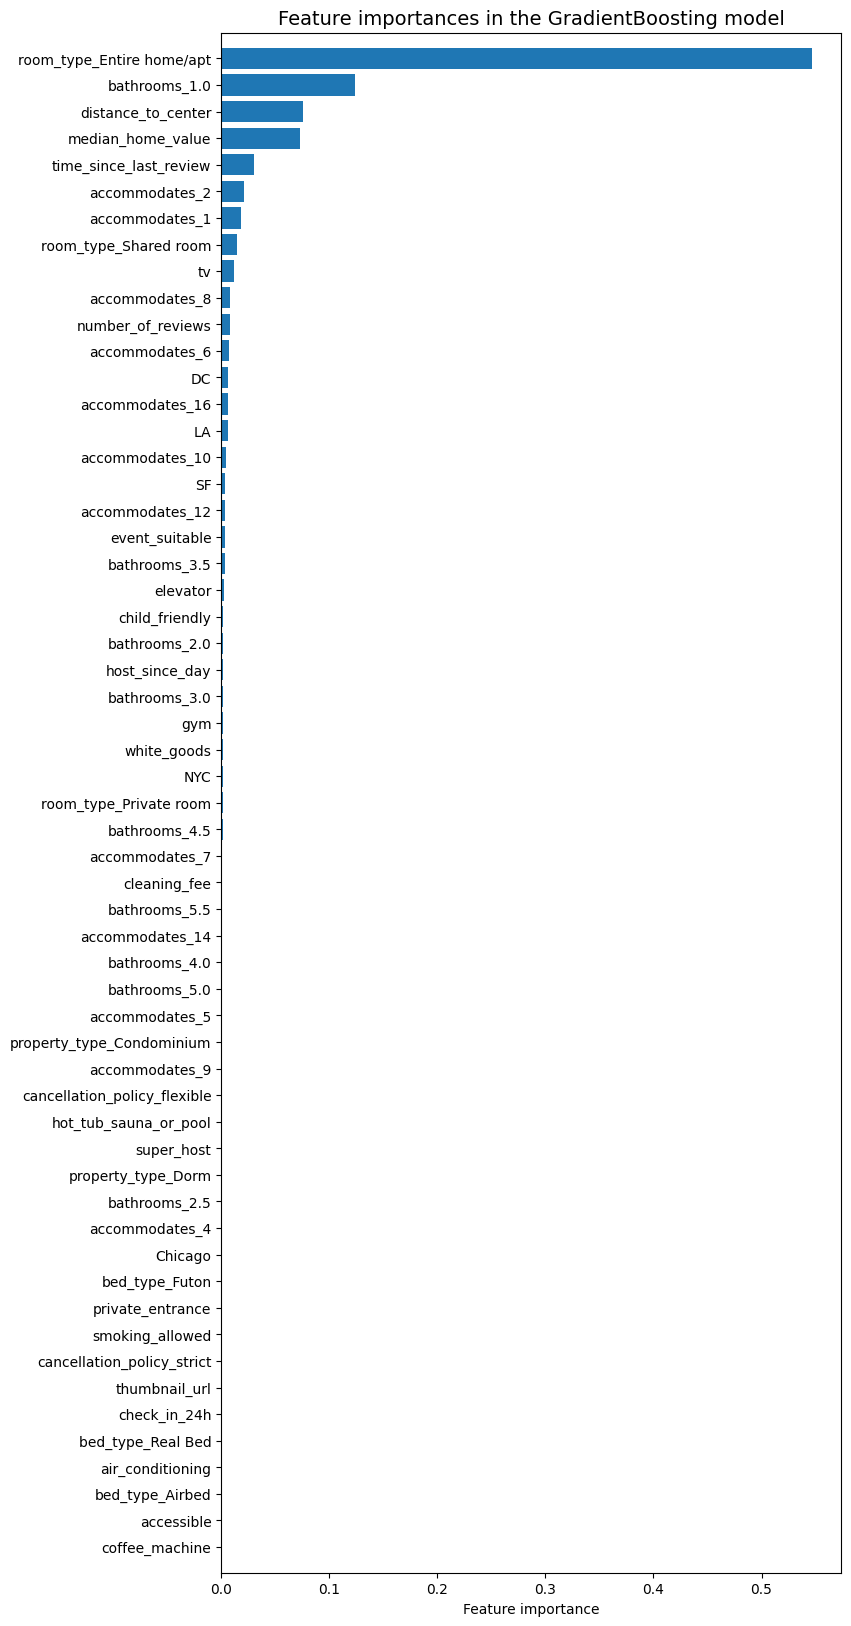

In [50]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_gb.index, ft_weights_gb.weight, align='center') 
plt.title("Feature importances in the GradientBoosting model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

## Compare

In [37]:
r2_list = {"Linear Regression": r2_lr,
          "Random Forest": r2_rf ,
          "Polynomial Regression": r2_poly,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb}

mae_list = {"Linear Regression": mae_lr,
          "Random Forest": mae_rf ,
          "Polynomial Regression": mae_poly,
          "CatBoost": mae_cbr,
          "Gradient Boosting":mae_gb ,
          "XGBoost": mae_xgb}

mse_list = {"Linear Regression": mse_lr,
          "Random Forest": mse_rf ,
          "Polynomial Regression": mse_poly,
          "CatBoost": mse_cbr,
          "Gradient Boosting":mse_gb ,
          "XGBoost": mse_xgb}

rmse_list = {"Linear Regression": rmse_lr,
          "Random Forest": rmse_rf ,
          "Polynomial Regression": rmse_poly,
          "CatBoost": rmse_cbr,
          "Gradient Boosting":rmse_gb ,
          "XGBoost": rmse_xgb}

In [38]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [39]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.625480,0.325222,0.188725,0.434425
Random Forest,0.688581,0.289926,0.156928,0.396141
Polynomial Regression,0.679255,0.300171,0.161627,0.402029
CatBoost,0.709775,0.282047,0.146248,0.382424
Gradient Boosting,0.659990,0.307882,0.171335,0.413927
XGBoost,0.700839,0.286128,0.150751,0.388267


# Tuning


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
-0.19884401094124401

# Modeling notlar

## Geri donup denenecek yerler

- 
- Litaraturde hangi modeller neden kullanilmis
- Genl olarak modellerin ozellikleri, hangisi bizimkine uygun
- PCA
- Importanceleri belirlmek icin hangi yontemler var
- Gercek deger tahmin deger inclemesi(satirlar icin)
- Ml1 dersinde son yarim saat
- Name ve description ile alakali litaratur